In [0]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))])
training_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False)

In [0]:
def im_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    print(image.shape)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


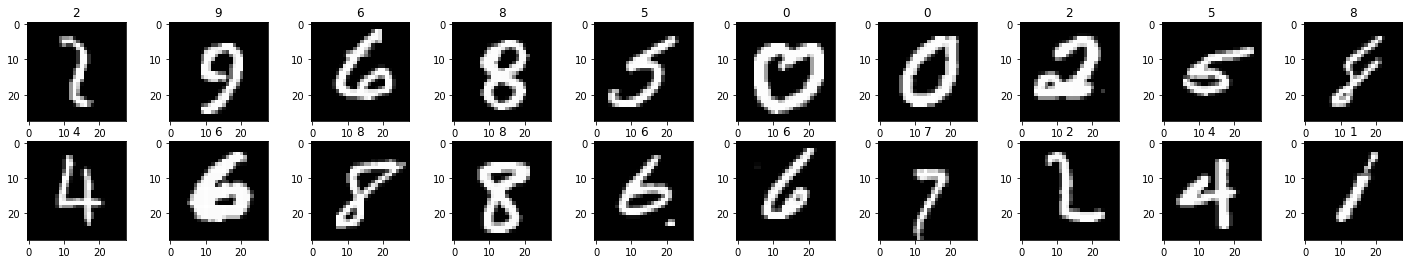

In [4]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for i in np.arange(20):
    ax = fig.add_subplot(2, 10, i+1)
    plt.imshow(im_convert(images[i]))
    ax.set_title(labels[i].item())

In [0]:
class Classifier(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    

In [6]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [0]:
criterion  = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [8]:
epochs = 12
running_loss_history = []
running_acc_history = []
val_loss_history = []
val_acc_history = []

for e in range(epochs):
    running_loss = 0.0
    running_corrects = 0

    val_running_loss = 0.0
    val_corrects = 0.0
    
    for inputs, labels in train_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)
        
        running_loss += loss.item()
    else:
        with torch.no_grad():
              for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.view(val_inputs.shape[0], -1)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_corrects += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = running_corrects.float() / len(train_loader)
        running_loss_history.append(epoch_loss)

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_acc = val_corrects.float() / len(validation_loader)
        val_loss_history.append(val_epoch_loss)


        print("training loss: {:.4f} validation loss: {:.4f}".format(epoch_loss, val_epoch_loss))

training loss: 0.4392 validation loss: 0.2556
training loss: 0.2220 validation loss: 0.1684
training loss: 0.1525 validation loss: 0.1290
training loss: 0.1202 validation loss: 0.1353
training loss: 0.1006 validation loss: 0.1007
training loss: 0.0865 validation loss: 0.0912
training loss: 0.0765 validation loss: 0.1170
training loss: 0.0699 validation loss: 0.0905
training loss: 0.0608 validation loss: 0.1020
training loss: 0.0571 validation loss: 0.1110
training loss: 0.0527 validation loss: 0.0864
training loss: 0.0467 validation loss: 0.0900


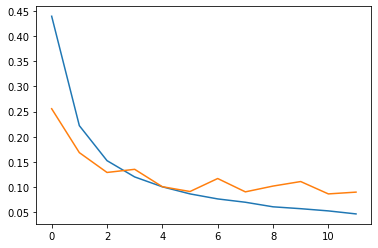

In [9]:
plt.plot(running_loss_history, label="Training loss")
plt.plot(val_loss_history, label="Validation loss")

In [1]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images_ = iamges.view(image.shape[0], -1)
output = model(images_)

_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for i in range(20):
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[i]))
    ax.set_title("{} ({})".format(str(preds[i].item()), str(labels[i].item())), color=("green" if preds[i] == labels[i] else "red"))

NameError: name 'validation_loader' is not defined